In [8]:
import pandas as pd
import numpy as np

df = pd.read_excel("C:/Users/secar/OneDrive/Documents/UCLA/Risk/Barclay's stock 2006-2008.xlsx")

df.columns = (
    df.columns.astype(str)
      .str.replace("\xa0", " ", regex=False)  # non-breaking spaces
      .str.strip()
)

print(df.columns.tolist())  # check what you actually have

adj_col = None
for c in df.columns:
    if c.lower().replace(" ", "") in ["adjclose", "adjclose*"]:
        adj_col = c
        break
if adj_col is None:

    candidates = [c for c in df.columns if ("adj" in c.lower() and "close" in c.lower())]
    if candidates:
        adj_col = candidates[0]

print("Using adjusted close column:", adj_col)

df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")
df = df.sort_values("Date")

df["ret"] = np.log(df[adj_col] / df[adj_col].shift(1))

df["q01"] = df["ret"].expanding(min_periods=50).quantile(0.01).shift(1)
df["VaR_99_1d"] = -df["q01"]

var_2008 = df[df["Date"].dt.year == 2008][["Date", "ret", "VaR_99_1d"]].dropna()

pd.set_option("display.max_rows", None)
var_2008

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
Using adjusted close column: Adj Close


,Date,ret,VaR_99_1d
254,2008-01-02,0.000993,0.052190
253,2008-01-03,0.007905,0.052166
252,2008-01-04,-0.044226,0.052116
251,2008-01-07,-0.030794,0.052066
250,2008-01-08,0.002649,0.052015
249,2008-01-09,-0.030596,0.051965
248,2008-01-10,-0.012625,0.051915
247,2008-01-11,0.027222,0.051864
246,2008-01-14,0.031722,0.051814
245,2008-01-15,-0.033875,0.051764


In [9]:
var_2008.to_excel("Barclays_VaR_2008.xlsx", index=False)

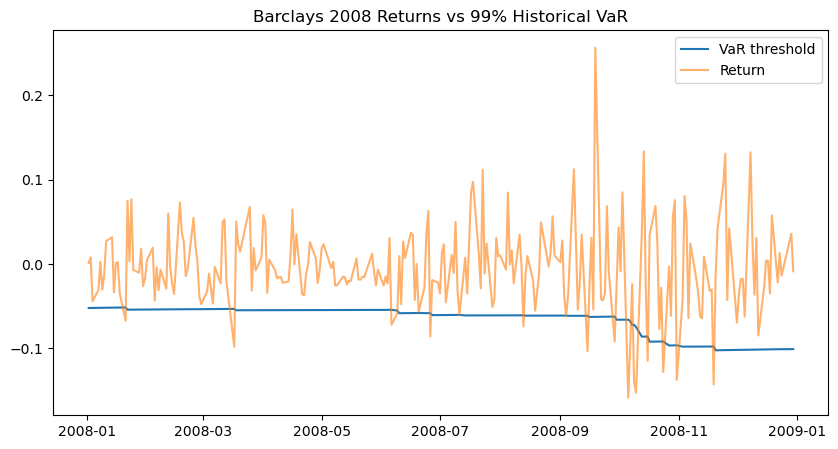

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(var_2008["Date"], -var_2008["VaR_99_1d"], label="VaR threshold")
plt.plot(var_2008["Date"], var_2008["ret"], label="Return", alpha=0.6)
plt.legend()
plt.title("Barclays 2008 Returns vs 99% Historical VaR")
plt.show()

In [14]:
var_2008["exception"] = (var_2008["ret"] < -var_2008["VaR_99_1d"]).astype(int)
n_days = var_2008["exception"].count()
n_exc  = var_2008["exception"].sum()
exc_rate = n_exc / n_days
exc_rate

0.07171314741035857

In [15]:
n_exc

18

In [17]:
xls = pd.ExcelFile("C:/Users/secar/OneDrive/Documents/UCLA/Risk/Barclay's stock 2006-2008.xlsx")
sheet_names = xls.sheet_names
sheet_names

["Barclay's",
 'Goldman',
 'UBS',
 'JP Morgan',
 'Citigroup',
 'Morgan Stanley',
 'Deutsche',
 'Bank of America',
 'BNP Paribus',
 'Credit Suisse']

In [19]:
bank_dfs = {}

for name in sheet_names:
    df = pd.read_excel(xls, sheet_name=name)

    df.columns = df.columns.astype(str).str.replace("\xa0"," ").str.strip()

    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")
    df = df.sort_values("Date")

    adj = [c for c in df.columns if "adj" in c.lower() and "close" in c.lower()][0]

    df["ret"] = np.log(df[adj] / df[adj].shift(1))

    bank_dfs[name] = df[["Date", "ret"]]

In [20]:
returns = bank_dfs[sheet_names[0]][["Date", "ret"]].rename(columns={"ret": sheet_names[0]})

for name in sheet_names[1:]:
    returns = returns.merge(
        bank_dfs[name][["Date", "ret"]].rename(columns={"ret": name}),
        on="Date",
        how="inner"
    )

returns.head()

,Date,Barclay's,Goldman,UBS,JP Morgan,Citigroup,Morgan Stanley,Deutsche,Bank of America,BNP Paribus,Credit Suisse
0,2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006119,NaN
1,2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006119,NaN
2,2006-01-04,0.015261,-0.013949,0.019407,0.019407,-0.018632,-0.018632,0.018917,-0.010822,0.022617,NaN
3,2006-01-05,-0.008809,-0.000324,0.002865,0.002865,0.004930,0.004930,-0.004696,0.001318,-0.002612,0.005194
4,2006-01-06,0.009608,0.014060,0.020666,0.020666,0.000000,0.000000,0.018474,-0.001318,0.002612,0.002670


In [21]:
weights = []

for i in range(len(sheet_names)):
    if (i+1) % 2 == 1:   # odd
        weights.append(1_000_000)
    else:               # even
        weights.append(2_000_000)

weights = np.array(weights)

In [22]:
R = returns[sheet_names].values        # T x 10 returns
pnl = R @ weights                      # portfolio $ P&L
returns["Portfolio_PnL"] = pnl

In [23]:
returns["Port_q01"] = (
    returns["Portfolio_PnL"]
    .expanding(min_periods=50)
    .quantile(0.01)
    .shift(1)
)

returns["Port_VaR_99"] = -returns["Port_q01"]

In [24]:
port_2008 = returns[returns["Date"].dt.year == 2008][["Date","Portfolio_PnL","Port_VaR_99"]].dropna()

In [25]:
port_2008

,Date,Portfolio_PnL,Port_VaR_99
592,2008-01-02,-1.950288e+05,5.401662e+05
593,2008-01-03,3.731850e+03,5.396407e+05
596,2008-01-07,-1.086594e+05,5.391153e+05
597,2008-01-08,-3.128807e+05,5.385898e+05
598,2008-01-09,2.136859e+05,5.380643e+05
599,2008-01-10,1.272970e+05,5.375388e+05
600,2008-01-11,-8.862264e+03,5.370134e+05
601,2008-01-14,3.253824e+05,5.364879e+05
602,2008-01-15,-6.381168e+05,5.359624e+05
603,2008-01-16,-5.944690e+04,5.659105e+05


In [26]:
dvar = {}

for name in sheet_names:
    r = returns[name]
    q01 = r.expanding(min_periods=50).quantile(0.01)
    dvar[name] = -q01.iloc[-1]  

dvar = pd.Series(dvar, name="DVaR_99")
dvar

Barclay's          0.097489
Goldman            0.088054
UBS                0.115194
JP Morgan          0.115194
Citigroup          0.135783
Morgan Stanley     0.135783
Deutsche           0.115952
Bank of America    0.110514
BNP Paribus        0.078751
Credit Suisse      0.062466
Name: DVaR_99, dtype: float64

In [27]:
cvar = {}

for name in sheet_names:
    r = returns[name].dropna()
    q01 = r.quantile(0.01)
    cvar[name] = -r[r <= q01].mean()

cvar = pd.Series(cvar, name="CVaR_99")
cvar

Barclay's          0.130807
Goldman            0.128242
UBS                0.165270
JP Morgan          0.165270
Citigroup          0.204684
Morgan Stanley     0.204684
Deutsche           0.149689
Bank of America    0.180285
BNP Paribus        0.107475
Credit Suisse      0.094960
Name: CVaR_99, dtype: float64